In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def critical_max(x,y):
      cp_x,cp_y,cp_i=[],[],[]
      for i in range(len(x)):
        if i+1<len(x) and i-1>=0:
          d1=(y[i+1]-y[i])/(x[i+1]-x[i])
          d2=(y[i]-y[i-1])/(x[i]-x[i-1])
          if d1*d2<0 and y[i]>=y[i+1] and y[i]>=y[i-1]:
            cp_i.append(i)
            cp_x.append(x[i])
            cp_y.append(y[i])
      return cp_i,cp_x,cp_y

In [3]:
array_x = []
array_y = []

with open('experiment_5_single_mode.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('    ')
        array_x.append(float(l[0]))
        array_y.append(float(l[1]))

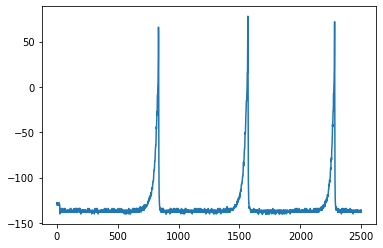

In [4]:
plt.plot(array_x,array_y)
plt.show()

In [5]:
index, xvalues, yvalues= critical_max(array_x,  array_y)

In [6]:
yvalues.sort() # sorting the peak 

y = np.array(array_y) # changing array_y from [] into array

print(yvalues[-3:]) # print the biggest peak

peak_index_array = []
for i in range(1,4,1):
    #print(yvalues[-i])
    #print(np.where(y == yvalues[-i])[0])
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])

print(peak_index_array)

[66.0, 72.0, 78.0]
[1569, 2281, 835]


1569.0
2281.0
[734.0, 712.0]
2074688.796680498


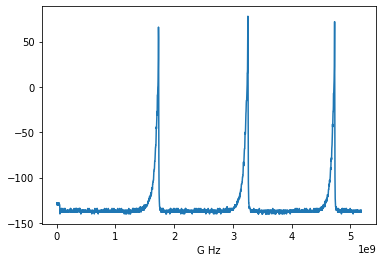

In [7]:
gap_array = []
for i in range(0,len(peak_index_array)-1):
    print(array_x[peak_index_array[i]])
    gap_array.append( abs(array_x[peak_index_array[i-1]]-array_x[peak_index_array[i]]))

print(gap_array)
average_of_the_gap = sum(gap_array)/len(gap_array)
frequency = 1.5 * 10 ** 9
frequency_ticks = frequency / average_of_the_gap
print(frequency_ticks)


max_freq = 2500 * frequency_ticks

frequency_array = np.arange(0,max_freq,frequency_ticks)



plt.plot(frequency_array,array_y)
plt.xlabel("G Hz")
plt.show()


In [8]:
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    freq_difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return freq_difference
    
#print(half_max_x(frequency_array,array_y))
frequency_array_1 = frequency_array[0:1000]
array_y_1 = array_y[0:1000]
frequency_array_2 = frequency_array[1000:2000]
array_y_2 = array_y[1000:2000]
frequency_array_3 = frequency_array[2000:2500]
array_y_3 = array_y[2000:2500]


# Delta mu_2
mu_2_array = []
mu_2_array.append(half_max_x(frequency_array_1,array_y_1))
mu_2_array.append(half_max_x(frequency_array_2,array_y_2))
mu_2_array.append(half_max_x(frequency_array_3,array_y_3))

#print(half_max_x(frequency_array_1,array_y_1))
# del(lambda) = lambda^2 / c * del(mu)
c = 3 * 10 ** 8
lamda = 632 * 10 **(-9)
del_lamda = []
for i in range(0,len(mu_2_array)):
  del_lamda.append((lamda**2 / c) * mu_2_array[i])

print(del_lamda)



[4.67012914598759e-14, 5.359691607549193e-14, 4.32605247860175e-14]


In [9]:
# 27.5 cm = L

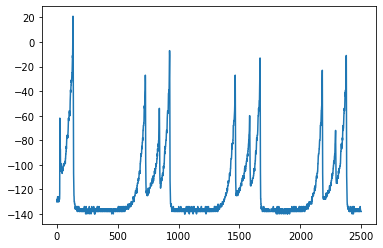

In [10]:
array_x = []
array_y = []

with open('experiment_5_triangle_mode.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('    ')
        array_x.append(float(l[0]))
        array_y.append(float(l[1]))
        
plt.plot(array_x,array_y)
plt.show()

In [11]:
index, xvalues, yvalues= critical_max(array_x,  array_y)

yvalues.sort() # sorting the peak 

y = np.array(array_y) # changing array_y from [] into array

print(yvalues[-3:]) # print the biggest peak

peak_index_array = []
for i in range(1,4,1):
    #print(yvalues[-i])
    #print(np.where(y == yvalues[-i])[0])
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])

print(peak_index_array)


[-11.0, -7.0, 21.0]
[133, 926, 129]


133.0
926.0
[4.0, 793.0]
3764115.4328732747


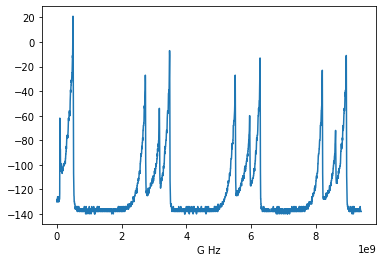

In [12]:
gap_array = []
for i in range(0,len(peak_index_array)-1):
    print(array_x[peak_index_array[i]])
    gap_array.append( abs(array_x[peak_index_array[i-1]]-array_x[peak_index_array[i]]))

print(gap_array)
average_of_the_gap = sum(gap_array)/len(gap_array)
frequency = 1.5 * 10 ** 9
frequency_ticks = frequency / average_of_the_gap
print(frequency_ticks)


max_freq = 2500 * frequency_ticks

frequency_array = np.arange(0,max_freq,frequency_ticks)



plt.plot(frequency_array,array_y)
plt.xlabel("G Hz")
plt.show()


In [13]:
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    freq_difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return freq_difference
    
#print(half_max_x(frequency_array,array_y))
frequency_array_1 = frequency_array[0:1000]
array_y_1 = array_y[0:1000]
frequency_array_2 = frequency_array[1000:2000]
array_y_2 = array_y[1000:2000]
frequency_array_3 = frequency_array[2000:2500]
array_y_3 = array_y[2000:2500]


# Delta mu_2
mu_2_array = []
mu_2_array.append(half_max_x(frequency_array_1,array_y_1))
mu_2_array.append(half_max_x(frequency_array_2,array_y_2))
mu_2_array.append(half_max_x(frequency_array_3,array_y_3))

print(half_max_x(frequency_array_3,array_y_3))
# del(lambda) = lambda^2 / c * del(mu)
c = 3 * 10 ** 8
lamda = 632 * 10 **(-9)
del_lamda_1 = []
for i in range(0,len(mu_2_array)):
  del_lamda_1.append((lamda**2 / c) * mu_2_array[i])

print(del_lamda_1)


72137068.05927658
[3.57076035131744e-14, 9.485959317136253e-14, 9.604425424169497e-14]


In [14]:
# [4.67012914598759e-14, 5.359691607549193e-14, 4.32605247860175e-14] ------- experiment_5_single_mode

# [3.2063853211006295e-15, 2.877394020507312e-14, 0.0] ---------------------- experiment_5

# [3.1467708814745837e-15, 5.2035102228348123e-14, 4.690299355556386e-14] --- experiment_5_1

# [1.6448933996702439e-15, 6.370398724080535e-16, 1.552029391043625e-15] ---- experiment_5_2

# [3.57076035131744e-14, 9.485959317136253e-14, 9.604425424169497e-14] ------ experiment_5_triangle_mode


In [15]:
del_lambda_final = []
del_lambda_final.extend([4.67012914598759e-14, 5.359691607549193e-14, 4.32605247860175e-14, 3.2063853211006295e-15, 2.877394020507312e-14, 3.1467708814745837e-15, 5.2035102228348123e-14, 4.690299355556386e-14, 1.6448933996702439e-15, 6.370398724080535e-16, 1.552029391043625e-15, 3.57076035131744e-14, 9.485959317136253e-14, 9.604425424169497e-14])
print(del_lambda_final)

[4.67012914598759e-14, 5.359691607549193e-14, 4.32605247860175e-14, 3.2063853211006295e-15, 2.877394020507312e-14, 3.1467708814745837e-15, 5.2035102228348123e-14, 4.690299355556386e-14, 1.6448933996702439e-15, 6.370398724080535e-16, 1.552029391043625e-15, 3.57076035131744e-14, 9.485959317136253e-14, 9.604425424169497e-14]


In [16]:
del_average_lambda = sum(del_lambda_final)/len(del_lambda_final)
print('Average del(lambda) = ', del_average_lambda)

Average del(lambda) =  3.629066700730711e-14


In [17]:
import statistics

stdev_del_lambda = statistics.stdev(del_lambda_final)

print('Stdev del(lambda) = ', stdev_del_lambda)

Stdev del(lambda) =  3.2517448192615286e-14


In [18]:
# 3.133459712804049e-14 -------------- np.std
# 3.2517448192615286e-14 ------------- stadistics.stdev  this one agrees with R

In [19]:
import math

error_stdev = stdev_del_lambda / math.sqrt(len(del_lambda_final))

print('Error del(lambda) = ', error_stdev)

Error del(lambda) =  8.690653587781281e-15


In [20]:
print('Fianl result = ', del_average_lambda, '+-', error_stdev, 'm')

Fianl result =  3.629066700730711e-14 +- 8.690653587781281e-15 m
